# Preliminary Findings and Hypotheses Sprint Journal for Runjini Murthy

## Part 1 (Week 1): Pair EDA and Concept Demonstration

### 1. Exploratory Data Analysis Concepts to use or test on this project
concepts, definitions, why you are interested or think they will be useful. These are the concepts you will illustrate in the sections below. Recommend selecting 3-5, but choose as many as you think you can explore comprehensively.

### 2. Professionally Relevant Datasets
Find a dataset that would be useful for you to become more familiar with professionally. Can identify multiple (max 3 recommended):
1. Facebook campaign data
2. AdWords data
3. Email marketing data
4. Website traffic data

### 3. EDA Steps for your partner to explore your dataset(s)
The first part of this sprint project will be to trade datasets with a partner. The idea for the exercise is to think about what you think might be interesting about a dataset and create an EDA plan to explore it. Except the first pass will be for your partner to carry out your EDA plan and report back to you with preliminary findings.

Create a new Jupyter notebook (python or R) that loads your dataset and includes cells for the steps you want your partner to take and empty cells for the code to complete them as well as empty cells where preliminary findings should go.

### 4. Carrying out your Partner's EDA Steps
Scripts for Michael and Tori in folder.

### 5. Applying your EDA Concepts (step 1) to your partner's dataset. 
Concepts to review:
1. Multivariate
2. *Distribution / Histogram*
3. Central Tendency
4. *Kurtosis*
5. Stem and leaf
6. *Box plot*
7. *Correlation*
8. Covariance
9. *Scatter plot*
10. Clustering
11. Factor analysis

### Miscellaneous Links
Date conversion: https://www.displayr.com/r-date-conversion/
How to remove NA: https://stackoverflow.com/questions/11254524/omit-rows-containing-specific-column-of-na [Used: subset(DF, !is.na(y))]


## Part 2 (Week 2): EDA of your Dataset
Walk through a polished Exploratory Data Analysis exercise in your personal repo. This can include the steps that you laid out originally, any new steps and new ideas you have, or any new techniques you developed from the concepts in (5.) above. 

Your final deliverable repo should include a 
- 1.) readme and a script file OR
- 2.) a notebook 

that illustrates your analysis and leads to preliminary findings and hypotheses about the dataset for future investigation or more thorough analysis.

In [21]:
# Load up necessary packages
library(readr)
require(devtools)
install_github("Displayr/flipTime")
library(flipTime)

# Import data file
aalii_facebook <- read_csv("Aalii-Campaigns-Dec-15-2017-Feb-4-2018.csv")

Skipping install of 'flipTime' from a github remote, the SHA1 (2888936a) has not changed since last install.
  Use `force = TRUE` to force installation
Parsed with column specification:
cols(
  reporting_start = col_character(),
  reporting_end = col_character(),
  campaign_name = col_character(),
  delivery = col_character(),
  results = col_integer(),
  result_indicator = col_character(),
  reach = col_integer(),
  impressions = col_integer(),
  cost_per_result = col_double(),
  amount_spent = col_double(),
  end_date = col_character(),
  frequency = col_double(),
  link_clicks = col_integer(),
  button_clicks = col_integer(),
  comments = col_integer(),
  reactions = col_integer(),
  shares = col_integer(),
  engagement = col_integer()
)


In [22]:
# Clean up data set
aalii_facebook$reporting_start <- AsDate(aalii_facebook$reporting_start)
aalii_facebook$reporting_end <- AsDate(aalii_facebook$reporting_end)
aalii_facebook$end_date <- AsDate(aalii_facebook$end_date)

# Remove NA values
# facebook <- na.omit(aalii_facebook) -- DO NOT USE.  This removes rows with ANY NA values, but in validating reach numbers, I saw that it removed the true maximum because there were no comments on that post.  
# facebook <- subset(aalii_facebook, !is.na(results)) -- DO NOT USE I used NA from the "results" column to remove NAs from the data set. When I re-did the sum for the amount spent on this subset, the result was lower than when I looked at the whole set.  Further review showed I was leaving off some campaigns where we did spend money but there were no results.  I realized I can't subset off of NA; it'll have to be where the reach is greater than 0.
facebook <- subset (aalii_facebook, aalii_facebook$reach > 0)  #Working subset is now those where reach is greater than 0.  There will be NAs, but those are okay to keep in the data set.

In [19]:
head(facebook)

Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 3

reporting_start,reporting_end,campaign_name,delivery,results,result_indicator,reach,impressions,cost_per_result,amount_spent,end_date,frequency,link_clicks,button_clicks,comments,reactions,shares,engagement
2018-02-04,2018-02-04,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,274,actions:post_engagement,5436,5508,0.2004380,54.92,2018-02-05,1.013245,24,23,1,244,2,274
2018-02-04,2018-02-04,20180204-20180204 Lead Gen OO,active,7,actions:leadgen.other,4115,4431,14.0557143,98.39,2018-02-04,1.076792,71,0,NA,17,1,89
2018-02-03,2018-02-03,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,545,actions:post_engagement,8288,8545,0.1768257,96.37,2018-02-05,1.031009,28,25,3,508,3,545
2018-02-02,2018-02-02,"Post: ""Honolulu<89>۪s art scene has never been more...""",active,631,actions:post_engagement,4974,5311,0.1449128,91.44,2018-02-05,1.067752,20,17,2,603,3,631
2018-02-02,2018-02-02,20180129-20180202 Lead Gen OO,recently_completed,11,actions:leadgen.other,3401,3527,8.6127273,94.74,2018-02-02,1.037048,76,0,NA,7,NA,84
2018-02-01,2018-02-01,20180129-20180202 Lead Gen OO,recently_completed,30,actions:leadgen.other,6920,7340,6.6806667,200.42,2018-02-02,1.060694,150,0,NA,25,NA,176


In [26]:
# The Basics
# How many variables/columns?
length(facebook)
# 18

# What are the unique Facebook campaigns in the data set?
unique(facebook$campaign_name)

# How much money was spent in total over the course of this data set?
sum(facebook$amount_spent)
# 16601.66

# What was the max amount of money spent?
max(facebook$amount_spent)
# 644.75

# What was the minimum amount spent?
min(facebook$amount_spent)
# 7.29

# What was the maximum reach recorded?
max(facebook$reach)
# 21263

# What was the minimum reach recorded?
min(facebook$reach)
#2255


[1] 18

[1] "Post: \"Honolulu\x89۪s art scene has never been more...\""       
 [2] "20180204-20180204 Lead Gen OO"                                    
 [3] "20180129-20180202 Lead Gen OO"                                    
 [4] "Post: \"From post-its to your iPhone, design is a part of...\""   
 [5] "20180122-20180127 Lead Gen OO"                                    
 [6] "Post: \"You\x89۪ve heard of smart homes, smart devices, and...\""
 [7] "20180117-20180123 Lead Gen Turnkey"                               
 [8] "Post: \"Who was Ossipoff and what is mid-century modern...\""     
 [9] "20180111-20180119 Lead Gen Private Lanai"                         
[10] "2018011-20180117 Traffic Private Lanai"                           
[11] "20180109-20180115 'A'ali'i Blog Retargeting"                      
[12] "Post: \"Names have power. Learn more about the origins of...\""   
[13] "20180109-20180111 Lead Gen Turnkey"                               
[14] "Post: \"Shaken, not stirred: Bar Leather Apron provides...\""     
[15] "20171215-20180103 Lead Gen Turnkey"                               
[16] "20171228-20180103 Traffic Homefinder"                             
[17] "20171221-20171231 'A'ali'i Blog Retargeting"                      
[18] "Post: \"Catch a movie, take a free yoga class or meet up...\""    
[19] "Post: \"From Nobu to Piggy Smalls, find some of...\""             
[20] "20171215-20171222 Traffic Rottet"                                 
[21] "20171215-20171222 Traffic Turnkey"

[1] 16601.66

[1] 644.75

[1] 7.29

[1] 21263

[1] 333

In [ ]:
# Practice plots -- NOT SURE HOW TO USE YET
ggplot(facebook, aes(reach, engagement)) + geom_point()

ggplot(facebook, aes(amount_spent, engagement)) + geom_point()

ggplot(facebook) + geom_bar(aes(x=reporting_start,y=engagement),stat="summary", fun.y = "sum",fill=I("grey50"))

# Trying to repurpose this graph: http://ggplot.yhathq.com/; not working
ggplot(facebook, aes(x='amount_spent', y='clicks', color='campaign_name')) +
  geom_point() +
  scale_color_brewer(type='diverging', palette=3) +
  xlab("Reach") + ylab("Clicks") + ggtitle("Facebook_Campaigns")

# Key Concepts

## Histogram and Distribution
*Explanation of this concept relative to your data set here *

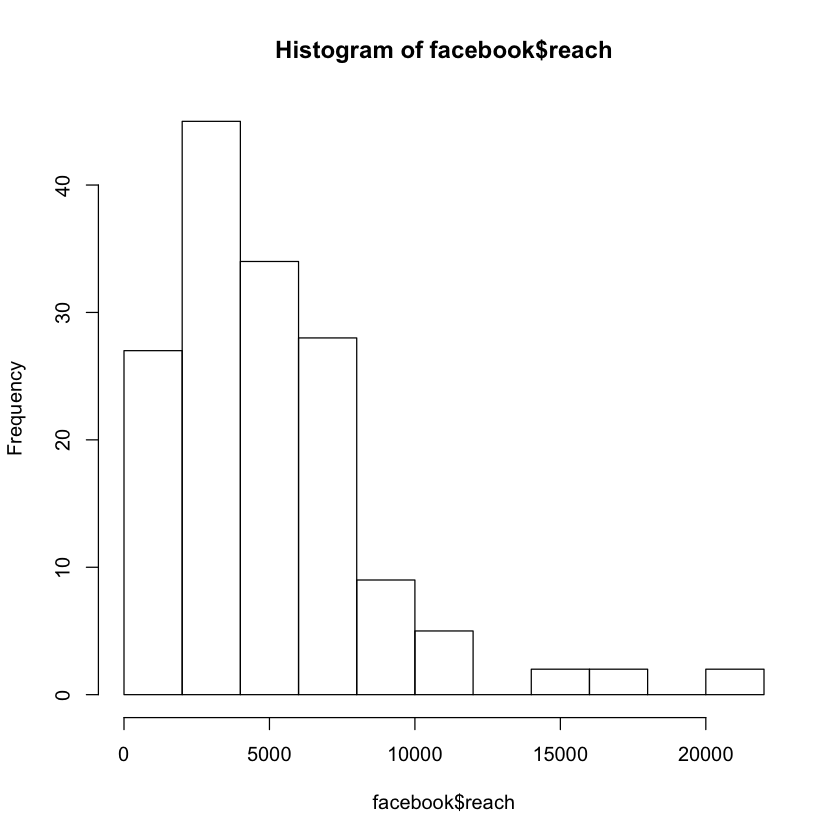

In [17]:
# Look at single variable distributions using histogram function
hist(facebook$reach)

In [ ]:
hist(facebook$amount_spent)

In [ ]:
hist(facebook$results)

## Scatter plots
*Explanation of this concept relative to your data set here *

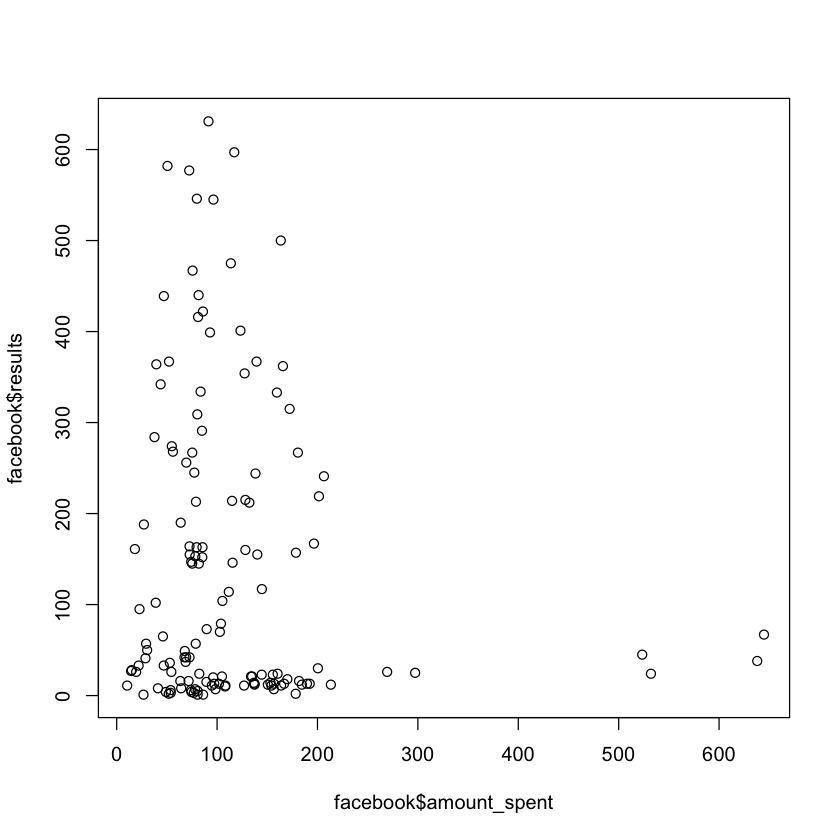

In [18]:
# Scatter plots
plot(facebook$amount_spent, facebook$results)

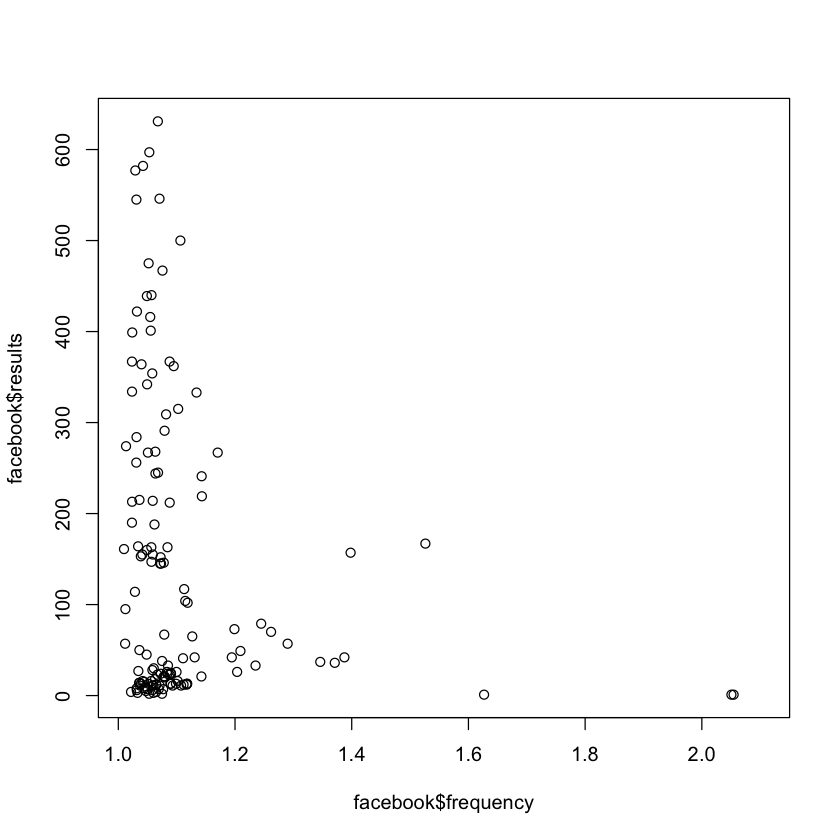

In [28]:
plot(facebook$frequency, facebook$results)

In [ ]:
plot(facebook$amount_spent, facebook$reactions)

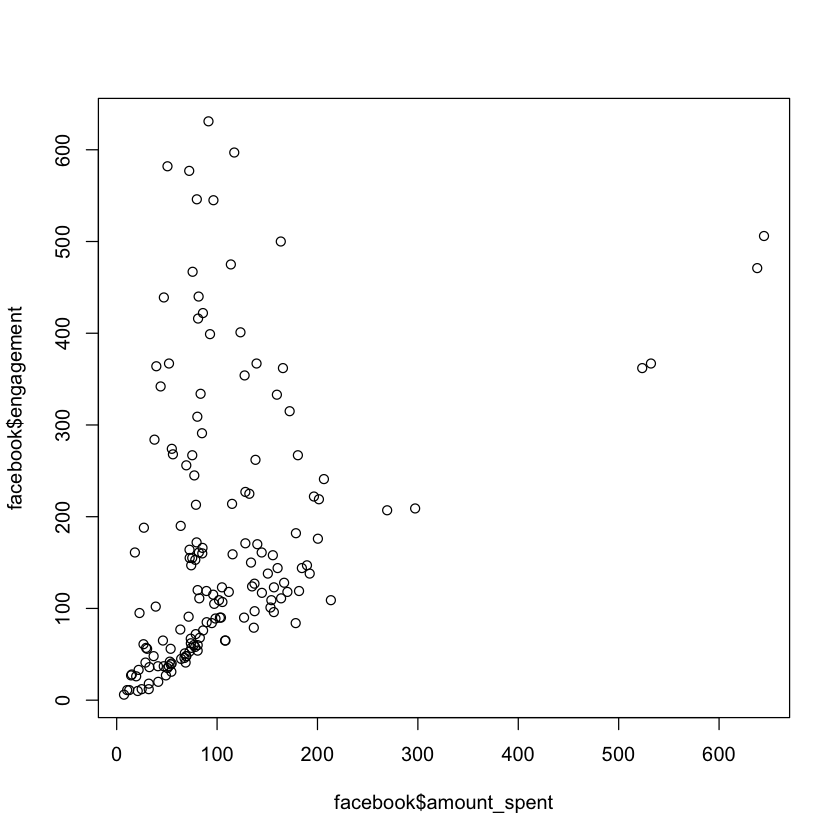

In [29]:
plot(facebook$amount_spent, facebook$engagement)

In [ ]:
plot(facebook$amount_spent, facebook$button_clicks)

In [ ]:
plot(facebook$amount_spent, facebook$link_clicks)

In [ ]:
plot(facebook$amount_spent, facebook$comments) # no correlation?

In [ ]:
plot(facebook$amount_spent, facebook$shares) # no correlation?

## Kurtosis
Definition from Investopedia: Kurtosis is a measure of the combined weight of a distribution's tails relative to the rest of the distribution. When a set of data is graphically depicted, it usually has a standard normal distribution, like a bell curve, with a central peak and thin tails. However, when kurtosis is present, the tails of the distribution are different than they would be under a normal bell-curved distribution.

There are three types of kurtosis:
Mesokurtic: Like a bell curve, but with fatter tails and a lower peak
Leptokurtic: Very thick tails and a tall/skinny peak [lepto = skinny]
Platykurtic: Slender tails and a lower peak [platy = broad]

(https://www.investopedia.com/terms/k/kurtosis.asp#ixzz56V4fqaEE)


## Box Plot
*Explanation of this concept relative to your data set here *

(https://www.statmethods.net/graphs/boxplot.html)

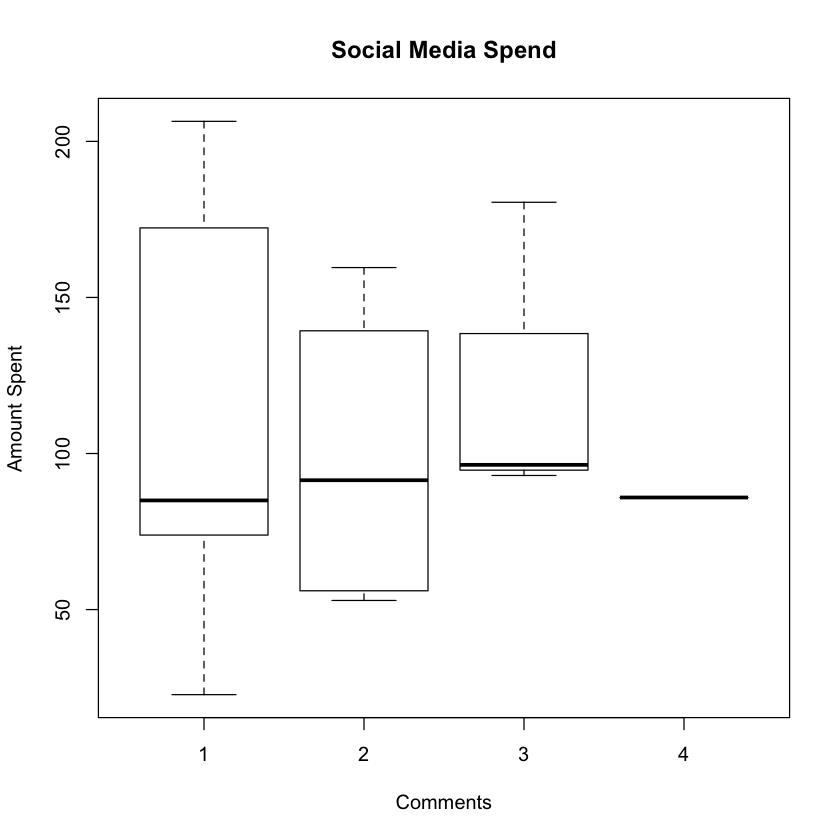

In [27]:
boxplot(amount_spent~comments,data=facebook, main="Social Media Spend", xlab="Comments", ylab="Amount Spent")

## Correlation
Correlation Coefficient

If the correlation coefficient is close to 1, it would indicate that the variables are positively linearly related and the scatter plot falls almost along a straight line with positive slope. For -1, it indicates that the variables are negatively linearly related and the scatter plot almost falls along a straight line with negative slope. And for zero, it would indicate a weak linear relationship between the variables.

(http://www.r-tutor.com/elementary-statistics/numerical-measures/correlation-coefficient)

QUESTION: How do you run correlation calculations with NA values present in certain rows?

In [30]:
amount_spent = facebook$amount_spent  # amount spent for FB ads
reach = facebook$reach                # the number of unique people reached by FB ads 
cor(amount_spent, reach)              # apply the cor function 

[1] 0.8489755